<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/deep_learning/BackToTheBasic_LRM_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


연속형 임의의 데이터 생성

In [2]:
np.random.seed(0)

Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [3]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano
})

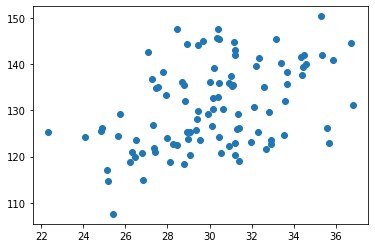

In [4]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [5]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.5))

In [6]:
model.fit(x=Data[['Temp']], y=Data[['Sales']], epochs=50, shuffle=True)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 19553.9492
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 6286.8418
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 780.4825
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 550.6920
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 1679.2900
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1690.5923
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 844.9114
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 234.5764
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 187.4678
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 360.4357
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 359.5342
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 216.9329
Epoch 13/50
4/4 [===========================

In [7]:
model.predict(Data[['Temp']])

array([[154.83037 ],
       [137.73067 ],
       [144.98457 ],
       [160.80873 ],
       [156.12807 ],
       [120.461205],
       [144.62538 ],
       [130.8161  ],
       [131.41965 ],
       [137.86157 ],
       [134.51967 ],
       [150.94655 ],
       [142.25517 ],
       [134.23923 ],
       [138.27863 ],
       [136.89714 ],
       [151.44562 ],
       [130.14157 ],
       [136.6388  ],
       [122.00559 ],
       [100.70586 ],
       [140.90842 ],
       [143.55151 ],
       [123.408905],
       [161.17058 ],
       [114.47976 ],
       [133.28743 ],
       [130.36694 ],
       [151.93082 ],
       [151.13568 ],
       [134.65637 ],
       [137.45491 ],
       [121.583206],
       [107.879684],
       [128.35182 ],
       [134.67395 ],
       [148.1384  ],
       [147.78847 ],
       [127.857666],
       [128.92365 ],
       [119.567604],
       [114.91039 ],
       [111.32153 ],
       [157.1714  ],
       [126.32401 ],
       [127.22142 ],
       [117.00693 ],
       [142.4

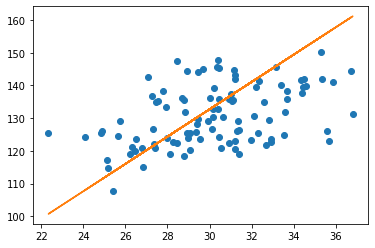

In [8]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['Temp'], model.predict(Data[['Temp']]))
plt.show()

In [9]:
ModelWeights = model.get_weights()
print(ModelWeights)

[array([[4.179136]], dtype=float32), array([7.3396606], dtype=float32)]


In [10]:
Data.head()

,Temp,Sales
0,35.292157,150.357363
1,31.200472,120.418399
2,32.936214,122.772334
3,36.722680,144.477853
4,35.602674,126.217687


In [11]:
Data['Temp'][0] * ModelWeights[0][0] + ModelWeights[1][0]

array([154.83037], dtype=float32)

In [12]:
model.predict(Data[['Temp']])[0]

array([154.83037], dtype=float32)